In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

We randomly generate 4 clusters.

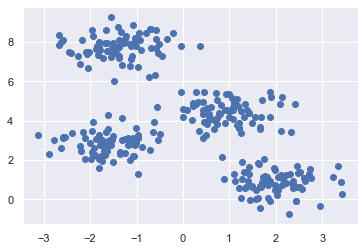

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


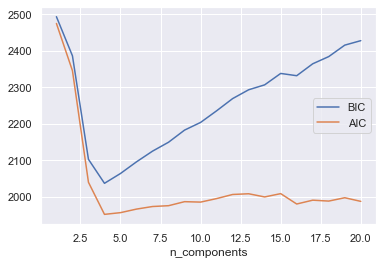

In [4]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [3]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

We use the predict method to obtain a list of points and their respective clusters.

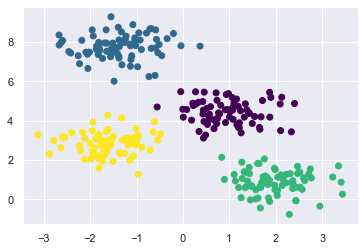

In [4]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

In [5]:
labels

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3], d

In [7]:
gmm.predict_proba(X)

array([[2.38140471e-03, 8.04672295e-21, 9.71688955e-01, 2.59296402e-02],
       [2.34837535e-15, 9.99999993e-01, 7.13116691e-33, 7.15846263e-09],
       [9.13480329e-09, 2.04767765e-08, 8.78022033e-12, 9.99999970e-01],
       ...,
       [3.40976171e-05, 8.75462809e-09, 4.92339895e-10, 9.99965893e-01],
       [1.52780115e-18, 9.99996988e-01, 6.44915198e-30, 3.01241053e-06],
       [9.99999561e-01, 4.05180546e-15, 1.99754828e-11, 4.39280339e-07]])